## Nome: Pablo Gilvan Borges
### Dados analisados: Titanic

### Quais os fatores que mais influênciaram em uma passageiro sobreviver ou não ao desastre? Será que fatores como idade, classe social e sexo influênciaram em uma pessoa conseguir sobreviver ou não?  Será que agrupando os dados por classe social, sexo e idade teremos um padrão no resultado dos dados? 
#### Procuro por meio desta análise identificar quais fatores que influênciaram para que os passageiros que sobreviveram tivessem  um destino diferente dos demais. 



# Variáveis

### Dependente: Índice de sobrevivência

### Independente: Idade, Sexo e Classe Social

#### Creio que fatores como idade e sexo(devido a época do ocorrido quando os homens procuravam dar prioridade para mulheres e crianças, quando o assunto era sobrevivência, onde tínhamos uma sociedade mais paternalista, deveriam ter uma forte influência quando se tratasse de assuntos mais grave). Também acredito que classe social sempre foi um determinante no quesito sobrevivência, infelizmente quem possui mais recursos, melhores cabines(como no caso do Titanic) e recursos para 'barganhar' por sua vida teria uma chance maior de sobrevivência. 

##### A ideia inicial é analisar a taxa de sobreviência: entre mulheres e homens, entre as classes sociais. Com isso teremos um overview se os fatores citados acima podem estar relacionados, depois agrupar estes dados por classe social e sexo e verificar se dentro de cada classe teremos o mesmo comportamento apresentado nas análises mais amplas.

##### OBS: o dataset apresenta a coluna Pclass com valores 1, 2 e 3. Aqui apresento estes valores como A, B e C, na respectiva ordem.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot
import seaborn as sb
%matplotlib inline

## Importando os dados

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




#### Verificando se os principais campos possuem nulos 
Se algum desses campos possuir valores nulos, temos que remove-los pois estes valores vão influênciar no resultado dos dados. A ideia é varrer cada uma das colunas com nossas variáveis chaves, que no nossa caso são: Survived, Pclass, Sex e Age. Vamos percorrer o dataset e para cada coluna verificamos se alguma delas possuí valores nulos. Se sim, vamos remover do dataset usando a opção 'inplace = true'.

In [4]:
print 'Dataframe com tamanho {size}, antes da exclusao dos campos com valores nulos.'.format(size=len(titanic_df))

for key in ['Survived', 'Pclass', 'Sex', 'Age']:
    if titanic_df[key].isnull().sum() > 0 :
        titanic_df.dropna(subset=[key], inplace=True)

print 'Dataframe com tamanho {size}, após a exclusao dos campos com valores nulos.'.format(size=len(titanic_df))

Dataframe com tamanho 891, antes da exclusao dos campos com valores nulos.
Dataframe com tamanho 714, após a exclusao dos campos com valores nulos.


#### Trocando os valores da coluna 'Pclass' pela especificação A, B e C ( já abordado na introdução). 
Vamos aplicar ao dataset, para valores da coluna Pclass, uma função que verifica qual número representa classe do passageiro e trocar os valores 1, 2 e 3 pelas letras, respectivamente, A,B e C.

In [5]:
titanic_df["Pclass"] = titanic_df["Pclass"].apply(lambda x: "A" if x == 1 else "B" if x == 2 else "C")

## Quem eram os passageiros?
A ideia deste agrupamento é entender como se deu a distribuição por sexo e classe.

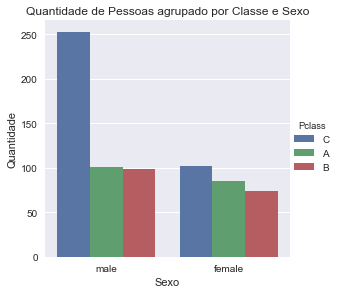

In [6]:
sb.factorplot('Sex', data=titanic_df, kind='count', hue='Pclass')
sb.plt.title('Quantidade de Pessoas agrupado por Classe e Sexo')
sb.plt.xlabel('Sexo')
sb.plt.ylabel('Quantidade')

Como podemos constatar no gráfico acima, a grande maioria das pessoas da classe C(3) são homens. Algo totalmente fora do padrão presente nas classes A(1) e B(2).


## Agrupando dados por sexo

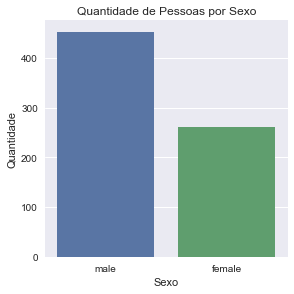

In [7]:
group_by_sex = titanic_df.groupby(['Sex'])[['Sex']].count()
sb.factorplot('Sex', data=titanic_df, kind='count')
sb.plt.title('Quantidade de Pessoas por Sexo')
sb.plt.xlabel('Sexo')
sb.plt.ylabel('Quantidade')

## Passageiros que morreram e sobreviveram por classe

Exibir de forma numérica a quantidade de sobreviventes por classe e de pessoas que morreram.

In [8]:
titanic_df.groupby(['Pclass', 'Survived'])[['Pclass']].count()

Pclass
Pclass Survived        
A      0             64
       1            122
B      0             90
       1             83
C      0            270
       1             85

Como podemos verificar no agrupamento acima, pessoas da classe C tiveram uma taxa de fatalidade muito maior que os demais grupos, em contrapartida a classe A foi a única que apresentou mais casos de sobrevivência do que fatalidades.

## Classificando grupos entre: homens, mulheres e crianças

#### Definindo que passageiros com menos de 16 anos serão tidos como crianças(essa ideia peguei de uma aula que fiz com outro professor)

In [9]:
def male_female_child(passanger):
    age, sex = passanger
    
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Survivor
0,1,0,C,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,no
1,2,1,A,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,yes
2,3,1,C,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,yes
3,4,1,A,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,yes
4,5,0,C,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,no


### Agrupando dados por classe e 'person'(homens, mulheres e crianças)

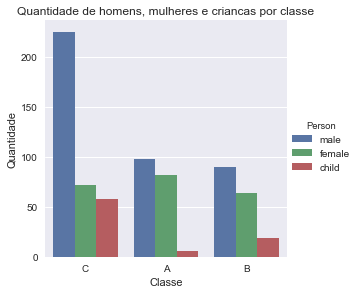

In [10]:
sb.factorplot('Pclass', data=titanic_df, kind='count', hue='Person')
sb.plt.title('Quantidade de homens, mulheres e criancas por classe')
sb.plt.xlabel('Classe')
sb.plt.ylabel('Quantidade')

Podemos perceber que a quantidade de homens presente na classe 'C'(3) é muito superior a de mulheres e crianças, perceba também que a distribuição de homens e mulheres nas classes 'A'(1) e 'B'(2) segue um padrão, mas estrapola quando na classe 'C'(3) 

#### No gráfico abaixo temos um agrupamento mais direto entre homens(male), mulheres(female) e crianças(child) e a quantidade de sobreviventes e fatalidades para cada grupo.

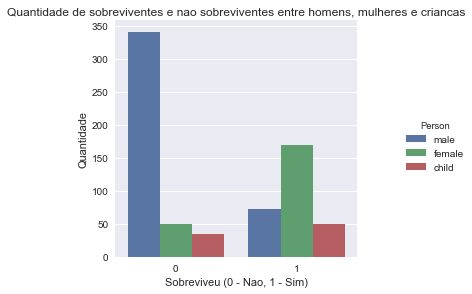

In [11]:
sb.factorplot('Survived', data=titanic_df, kind='count', hue='Person')
sb.plt.title('Quantidade de sobreviventes e nao sobreviventes entre homens, mulheres e criancas')
sb.plt.xlabel('Sobreviveu (0 - Nao, 1 - Sim)')
sb.plt.ylabel('Quantidade')

Podemos constatar a quantidade de fatalidades para homens é a única que é maior que a quantidades de pessoas que sobreviveram, pois se analisarmos tanto mulheres quanto crianças possuem mais sobreviventes do que mortos.

### Dentre todos os resultados os homens são os que possuem o menor desvio padrão, com destaque para homens da terceira classe

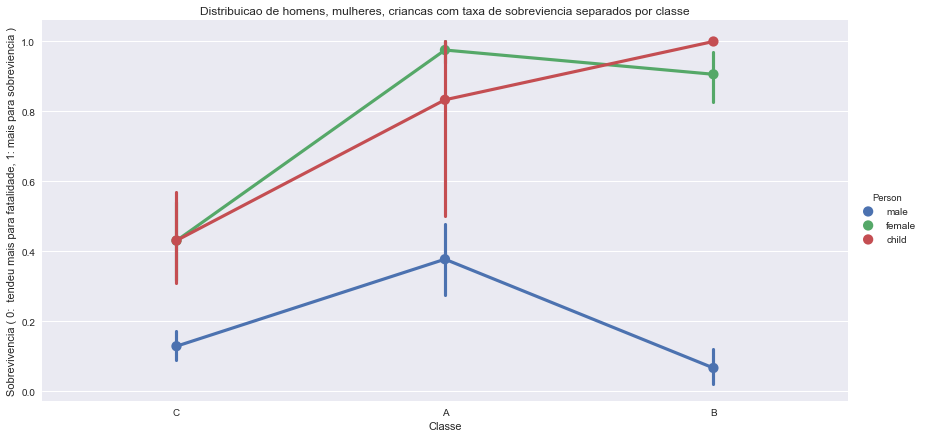

In [12]:
sb.factorplot('Pclass', 'Survived', hue='Person', data=titanic_df, kind='point', size=6, aspect=2)
sb.plt.title('Distribuicao de homens, mulheres, criancas com taxa de sobreviencia separados por classe')
sb.plt.xlabel('Classe')
sb.plt.ylabel('Sobrevivencia ( 0:  tendeu mais para fatalidade, 1: mais para sobreviencia )')

## Sobrevivência por classe

##### A ideia aqui é agrupar os dados por classe e sexo, exibindo assim a taxa de sobrevivência por sexo para cada classe de passageiro.

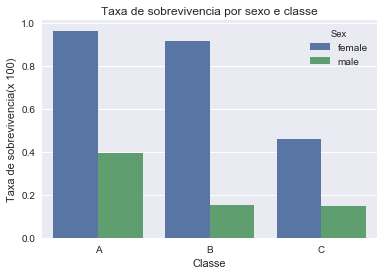

In [13]:
grouped = titanic_df.groupby(["Pclass","Sex"], as_index=False).mean()
sb.barplot(x="Pclass", y='Survived', hue='Sex', data = grouped)
sb.plt.title('Taxa de sobrevivencia por sexo e classe')
sb.plt.xlabel('Classe')
sb.plt.ylabel('Taxa de sobrevivencia(x 100)')

A taxa de sobreviência das mulheres é muito superior a dos homens em todas as classes sociais. Com destaque para a classe 'B', onde as mulheres tiveram uma diferença muito maior que a dos homens e onde os homens mantiveram uma taxa de sobreviência igual a dos homens da classe 'C'. Mesmo na classe 'A' as mulheres tiveram uma taxa quase duas vezes maior que a dos homens.

## Por distribuição de idade

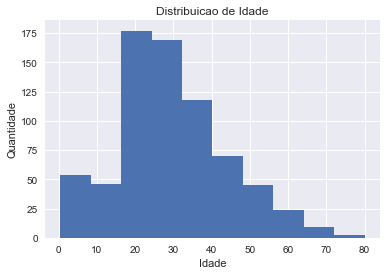

In [14]:
titanic_df['Age'].hist(bins=10)
sb.plt.title('Distribuicao de Idade')
sb.plt.xlabel('Idade')
sb.plt.ylabel('Quantidade')

### Distribuição de idade por sexo

A ideia é apresentar a distribuição da idade da amostragem, separando entre homens e mulheres.

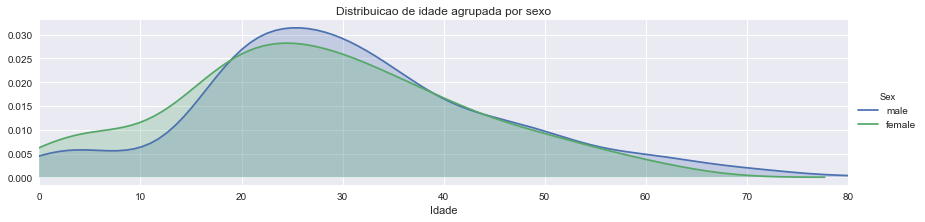

In [15]:
fig = sb.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sb.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

sb.plt.title('Distribuicao de idade agrupada por sexo')
sb.plt.xlabel('Idade')

fig.add_legend()

Grande parte da tripulação era composta por pessoas jovens, na faixa dos 15 até os 40 anos. E temos uma distribuição de idades bem parelha entre homens e mulheres. Podemos notar uma diferença somente no grupo que compõem as crinças, onde temos mais meninas que meninos.

### Distribuição por idade de sobreviventes e não sobreviventes. 
Mostrar a distribuição de idade entre sobreviventes e não sobreviventes.

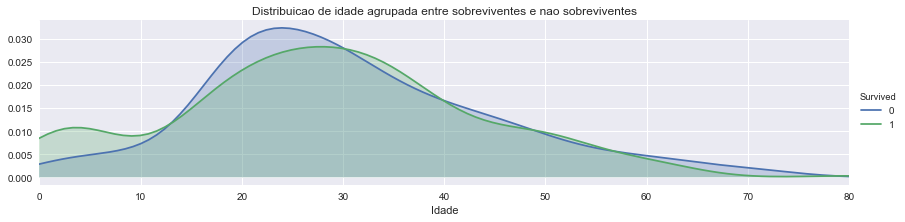

In [16]:
fig = sb.FacetGrid(titanic_df, hue='Survived', aspect=4)
fig.map(sb.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

sb.plt.title('Distribuicao de idade agrupada entre sobreviventes e nao sobreviventes')
sb.plt.xlabel('Idade')

fig.add_legend()

Podemos constatar que pessoas com idade entre 15 e 30 anos estiveram no grupo onde a taxa de mortalidade foi maior do que a de sobreviventes. No restante a amostragem mostra uma distribuição bem semelhante, com esse gráfico podemos supor que a idade não foi um fator que influênciou na sobreviência, ou não, de um individuo.

## Agrupamento por grupo(tipo) de Cabine

A ideia é mostrar a distribuição dos passageiros por tipo de cabine. Todas as cabines possuem uma letra inicial identificando o grupo da cabine. Para ficar mais fácil a visualização e mesmo ser possível agrupar, vamos pegar somente a primeira letra, a identificadora, para fazer o agrupamento.

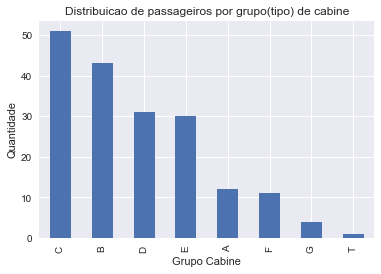

In [17]:
# Para agrupar por deck, devemos primeiro remover os na's
titanic_df_no_nas = titanic_df.copy()
titanic_df_no_nas.dropna(inplace=True)
titanic_df_no_nas['Cabin'].apply(lambda x: x[0]).value_counts().plot(kind="bar")
sb.plt.title('Distribuicao de passageiros por grupo(tipo) de cabine')
sb.plt.xlabel('Grupo Cabine')
sb.plt.ylabel('Quantidade')

Após analisar o diagrama da distribuição das cabines(link 1B do anexo), podemos verificar que os grupos de risco estava nos grupos F e G. Pois eram os que estavam nos níveis mais baixo. Infelizmente ao analisar o grupo de cabines, tomei por errado que o grupo das cabines não remetiam especificamente a classe dos passageiros. No link 1B(no anexo do projeto) nos detalha que o grupo da segunda classe(B) era composto das cabines do deck C ao E. 

## Número de sobrevivência por cabine

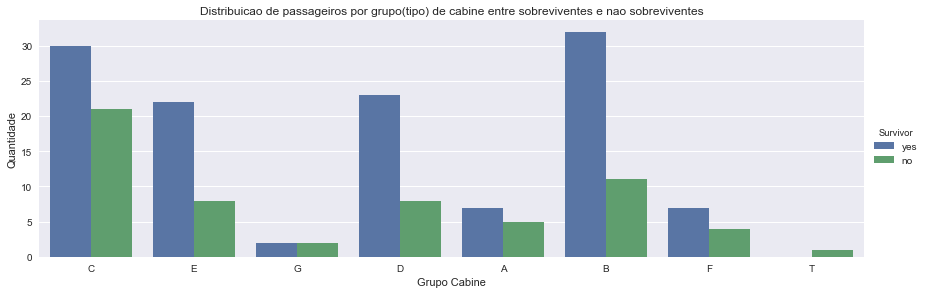

In [18]:
titanic_df_no_nas["Survivor"] = titanic_df_no_nas.Survived.map({0: "no", 1: "yes"})
titanic_df_no_nas['Cabin'] = titanic_df_no_nas['Cabin'].apply(lambda x: x[0])

sb.factorplot('Cabin', hue='Survivor', data=titanic_df_no_nas, kind='count', size=4, aspect=3) 
sb.plt.title('Distribuicao de passageiros por grupo(tipo) de cabine entre sobreviventes e nao sobreviventes')
sb.plt.xlabel('Grupo Cabine')
sb.plt.ylabel('Quantidade')

A ideia do gráfico era exibir a relação de sobreviventes apartir da localização de suas cabines. O gráfico apresenta um comportamente bem diferente do esperado, pois se analisarmos os grupos E, F e G, não presenciamos uma taxa de fatalidades maior que a de sobreviventes, pelo contrário, no grupo do deck E temos uma taxa de sobreviência muito maior que a de fatalidades.

## Contagem de passageiros sem identificação de cabine

Bom, pelo que já identificamos nos links(1A e 1B) do arquivo em anexo, a letra de identificação da cabine não condiz especificamente a classe social. O gráfico acima não exibe um mesmo comportamente que vemos ao fazer o agrupamente por sexo, idade ou mesmo classe. Para descartar totalmente esta variável da análise, vamos verificar a quantidade de registros com a coluna 'Cabin' faltante.

In [19]:
print "Total de passageiros sem identificação de cabines é de {total} ".format(total=titanic_df['Cabin'].isnull().sum())

Total de passageiros sem identificação de cabines é de 529 


Como podemos ver esta coluna se torna inviável e condiz com o estranho comportamento do gráfico acima, pois são 529 registros com a coluna com valor faltante. Não podemos considerar esta variável, pois são muitos registros faltantes.

### Taxa de sobrevivência agrupado de sexo e classe

Um dos agrupamentos mais importante da análise. Vamos agrupar os dados por Sexo e Classe e verificarmos qual a taxa de sobrevivência para cada caso.

In [20]:
## Separei as instruções para ficar melhor de visualizar
grouped = titanic_df.groupby(['Sex', 'Pclass'])['Survived']
grouped = grouped.agg([len, 'sum',np.mean]).rename(columns={'sum': 'Survived', 'len': 'Total'})
grouped.rename(columns={'mean': 'Survived_Rate'}, inplace=True)
grouped.reset_index(inplace = True)
grouped

,Sex,Pclass,Total,Survived,Survived_Rate
0,female,A,85,82,0.964706
1,female,B,74,68,0.918919
2,female,C,102,47,0.460784
3,male,A,101,40,0.396040
4,male,B,99,15,0.151515
5,male,C,253,38,0.150198


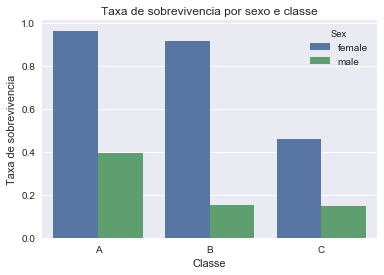

In [21]:
sb.barplot(x="Pclass", y='Survived_Rate', hue='Sex', data = grouped)
sb.plt.title('Taxa de sobrevivencia por sexo e classe')
sb.plt.xlabel('Classe')
sb.plt.ylabel('Taxa de sobrevivencia')

Como podemos constatar com os dados acima, a taxa de sobrevivência para mulheres é muito superior a dos homens, idependente da classe, mulheres possuem uma percentagem de sobrevivência muito alta nas classes A(1) e B(2), somente na classe C(3) que possuem uma percentagem menor, mesmo assim muito mais alta que a dos homens, que na classe C(3) é de apenas 13.5%.

## Conclusão

Podemos constatar, apartir desta amostragem, que se a pessoa fosse do sexo feminino, principalmente das classes A(1) e B(2) , teria uma chance de sobrevivência muito maior que a de ser homem, mesmo  mulheres da classe C(3) tiveram uma percentagem de sobrevivência muito maior do que a dos homens da classe A(1). Sendo homem da classe C(3) suas chances seriam de quase 1 em 10 de sobreviver, o mesmo vale para homens da classe B(2). Homens da classe A(1) ainda teriam uma chance de sobreviver inferior a das mulheres da classe C(3).

Claro que não podemos concluir de forma definitiva, com base somente nestas variáveis(presentes no dataset) que temos um efeito de causa apartir do gênero. 

#### Informações que poderiam ser relevantes, se presente: 

- Todos os integrantes da classe C, do sexo masculino, são simples passageiros ou este grupo também seria composto da tripulação do navio? Pois trabalhadores da zona da caudeira estariam em um grupo de risco muito maior que simples passageiros, pois segundo relatos do ocorrido esta foi a zona que sofreu a avaria do navio, resultando, lógicamente, na morte de muitos tripulantes.

- Na questão das cabines, há várias com valores faltantes. Temos um pequeno grupo das cabines do grupo 'T', seriam estes dados faltantes desse grupo de cabines? 

- O dataset apresenta cerca de 177 registros com idades nula, um valor bem expressivo para a quantidade de registros presentes no dataset e com isso podendo oferecer bastante influência nos resultados apresentados.


